# Guided Capstone Step 4. Pre-Processing and Training Data Development

**The Data Science Method**  


1.   Problem Identification 


2.   Data Wrangling 
  
 
3.   Exploratory Data Analysis   

4.   **Pre-processing and Training Data Development**  
 * Create dummy or indicator features for categorical variables
  * Standardize the magnitude of numeric features
  * Split into testing and training datasets
  * Apply scaler to the testing set
5.   Modeling 
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

**<font color='teal'> Start by loading the necessary packages as we did in step 3 and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [1]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

**<font color='teal'>  Load the csv file you created in step 3, remember it should be saved inside your data subfolder and print the first five rows.</font>**

In [2]:
df_model1 = pd.read_csv('Model1_dataset.csv')
df_model1 = df_model1.drop(columns = ["Unnamed: 0"])

df_model1.head(5)

,month,shop,brand,price,year,container,quantity_sold
0,1,shop_1,adult-cola,0.30,2016,can,29777.0
1,1,shop_1,adult-cola,0.39,2012,can,25696.0
2,1,shop_1,adult-cola,0.77,2015,can,14014.0
3,1,shop_1,adult-cola,0.79,2013,can,12185.0
4,1,shop_1,adult-cola,0.82,2017,can,13420.0


In [3]:
from sklearn.cluster import KMeans
x = df_model1.drop(['brand','container','shop','year'], axis =1).values
print(x)

[[1.0000e+00 3.0000e-01 2.9777e+04]
 [1.0000e+00 3.9000e-01 2.5696e+04]
 [1.0000e+00 7.7000e-01 1.4014e+04]
 ...
 [1.2000e+01 2.1000e+00 2.8458e+04]
 [1.2000e+01 2.2400e+00 2.6458e+04]
 [1.2000e+01 2.4300e+00 1.8219e+04]]


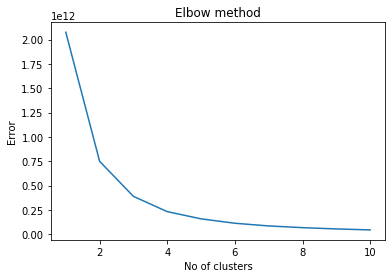

In [4]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

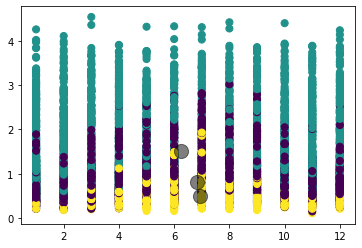

In [5]:
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans3, s=50, cmap='viridis')

centers = kmeans3.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## Create dummy features for categorical variables

**<font color='teal'> Create dummy variables for `Month` , `shop`, `brand` and `container` . Add the dummies back to the dataframe and remove the respective original column. </font>** 

In [6]:
#importance of dummy variable
df_model1 = pd.concat([df_model1, pd.get_dummies(df_model1['month'], prefix = "month_" )], axis=1).drop(['month'], axis =1)
print(df_model1.shape)
df_model1.head()

(6480, 18)


,shop,brand,price,year,container,quantity_sold,month__1,month__2,month__3,month__4,month__5,month__6,month__7,month__8,month__9,month__10,month__11,month__12
0,shop_1,adult-cola,0.30,2016,can,29777.0,1,0,0,0,0,0,0,0,0,0,0,0
1,shop_1,adult-cola,0.39,2012,can,25696.0,1,0,0,0,0,0,0,0,0,0,0,0
2,shop_1,adult-cola,0.77,2015,can,14014.0,1,0,0,0,0,0,0,0,0,0,0,0
3,shop_1,adult-cola,0.79,2013,can,12185.0,1,0,0,0,0,0,0,0,0,0,0,0
4,shop_1,adult-cola,0.82,2017,can,13420.0,1,0,0,0,0,0,0,0,0,0,0,0


In [7]:
df_model1 = pd.concat([df_model1, pd.get_dummies(df_model1['shop'], prefix = "shop_" )], axis=1).drop(['shop'], axis =1)
print(df_model1.shape)
df_model1.head()

(6480, 23)


,brand,price,year,container,quantity_sold,month__1,month__2,month__3,month__4,month__5,...,month__9,month__10,month__11,month__12,shop__shop_1,shop__shop_2,shop__shop_3,shop__shop_4,shop__shop_5,shop__shop_6
0,adult-cola,0.30,2016,can,29777.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,adult-cola,0.39,2012,can,25696.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,adult-cola,0.77,2015,can,14014.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,adult-cola,0.79,2013,can,12185.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,adult-cola,0.82,2017,can,13420.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [8]:
df_model1 = pd.concat([df_model1, pd.get_dummies(df_model1['brand'] )], axis=1).drop(['brand'], axis =1)
print(df_model1.shape)
df_model1.head()

(6480, 27)


,price,year,container,quantity_sold,month__1,month__2,month__3,month__4,month__5,month__6,...,shop__shop_2,shop__shop_3,shop__shop_4,shop__shop_5,shop__shop_6,adult-cola,gazoza,kinder-cola,lemon-boost,orange-power
0,0.30,2016,can,29777.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.39,2012,can,25696.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.77,2015,can,14014.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.79,2013,can,12185.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.82,2017,can,13420.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [9]:
df_model1 = pd.concat([df_model1, pd.get_dummies(df_model1['container'])], axis=1).drop(['container'], axis =1)
print(df_model1.shape)
df_model1.head()

(6480, 29)


,price,year,quantity_sold,month__1,month__2,month__3,month__4,month__5,month__6,month__7,...,shop__shop_5,shop__shop_6,adult-cola,gazoza,kinder-cola,lemon-boost,orange-power,can,glass,plastic
0,0.30,2016,29777.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,0.39,2012,25696.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,0.77,2015,14014.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,0.79,2013,12185.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0.82,2017,13420.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


## Standardize the magnitude of numeric features

Standarization of data is required when feature are on different scale which might have an impact on the model prediction. As for the data developed by us dont have such deviation in terms of scale so standarization is not required as of now.

In [10]:
#scale data
from sklearn import preprocessing
X=df_model1.drop(['quantity_sold'], axis=1)
y=df_model1.quantity_sold

In [11]:
X.isnull().sum(axis = 0)

price           0
year            0
month__1        0
month__2        0
month__3        0
month__4        0
month__5        0
month__6        0
month__7        0
month__8        0
month__9        0
month__10       0
month__11       0
month__12       0
shop__shop_1    0
shop__shop_2    0
shop__shop_3    0
shop__shop_4    0
shop__shop_5    0
shop__shop_6    0
adult-cola      0
gazoza          0
kinder-cola     0
lemon-boost     0
orange-power    0
can             0
glass           0
plastic         0
dtype: int64

In [12]:
y.isnull().sum(axis = 0)

0

## Split into training and testing datasets

**<font color='teal'> 
`Model 1`
    As the data is a sales data over a period of time so for predicting the fututre sales we will be splitting on yearly basis.
Train Data will be from 2012 to 2016 while test data will be data for the year 2017.
</font>**

In [13]:
Train = df_model1[df_model1['year'] < 2017]

In [14]:
Test = df_model1[df_model1['year'] == 2017]

In [15]:
X_Train = Train.drop(columns = ['quantity_sold', 'year'])

In [16]:
Y_Train = Train.quantity_sold

In [17]:
X_Test = Test.drop(columns = ['quantity_sold', 'year'])

In [18]:
Y_Test = Test.quantity_sold

**<font color='teal'> 
`Model 2`
    As the data is a sales data over a period of time so for predicting the fututre sales we will be splitting on yearly basis.
    This will be a Time series analysis for different brands
</font>**

In [19]:
df_adult_cola = pd.read_csv('Model2_dataset_adult_cola.csv')

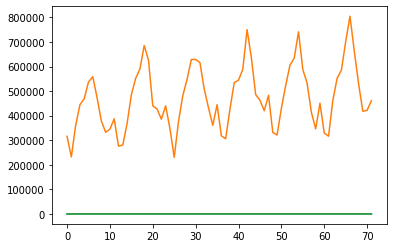

In [20]:
plt.plot(df_adult_cola)

In [21]:
df_adult_cola_ts = pd.read_csv('time_series_dataset_adult_cola.csv' , parse_dates = True , index_col = 'date')


In [22]:
df_adult_cola_ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 2012-01-31 to 2017-12-31
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   quantity_sold  72 non-null     float64
dtypes: float64(1)
memory usage: 1.1 KB


In [23]:
df_adult_cola_ts.head()

,quantity_sold
date,
2012-01-31,315852.0
2012-02-29,232201.0
2012-03-31,359081.0
2012-04-30,444008.0
2012-05-31,469280.0


In [24]:
yearly_mean = df_adult_cola_ts['quantity_sold'].resample('Y').mean()

In [25]:
yearly_mean = pd.DataFrame(yearly_mean)

In [26]:
yearly_mean.head()

,quantity_sold
date,
2012-12-31,402685.166667
2013-12-31,462846.250000
2014-12-31,466827.583333
2015-12-31,496190.500000
2016-12-31,493097.000000


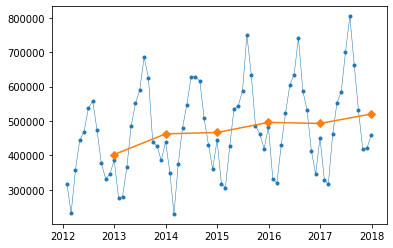

In [27]:
fig , ax = plt.subplots()
ax.plot(df_adult_cola_ts, marker = '.' , linestyle = '-' , linewidth = 0.5 , label = 'Monthly')
ax.plot(yearly_mean, marker = 'D' , markersize = 6 , linestyle = '-' , label = 'annual average')
#df_adult_cola_ts.plot(figsize= (12,12))
#plt.subplot(yearly_mean , marker = 'D')

# Guided Capstone Step 5. Modeling


This is the fifth step in the Data Science Method. In the previous steps you cleaned and prepared the datasets. Now it's time to get into the most exciting part: modeling! In this exercise, you'll build three different models and compare each model's performance. In the end, you'll choose the best model for demonstrating insights to Big Mountain management.



### **The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.   **Modeling**
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

## Fit Models with a Training Dataset

**<font color='teal'> Using sklearn, fit the model on your training dataset.</font>**

#### Model 1

In [28]:
#all first model set
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error
lm = linear_model.LinearRegression()
model = lm.fit(X_Train,Y_Train)

**<font color='teal'> Predict on the testing dataset and score the model performance with the y_test set and the y-pred values. The explained variance is a measure of the variation explained by the model. This is also known as the R-squared value. </font>**

Hint: you will have to use the `predict()` method here as it's used in this [DSM article](https://medium.com/@aiden.dataminer/the-data-science-method-dsm-modeling-56b4233cad1b) about modeling. 

In [29]:
# Make a variable called y_pred and assign it the result of calling predict() on our model variable with parameter X_test
y_pred = model.predict(X_Test)


## Review Model Outcomes — Iterate over additional models as needed

In [30]:
# You might want to use the explained_variance_score() and mean_absolute_error() metrics.
# To do so, you will need to import them from sklearn.metrics. 
# You can plug y_test and y_pred into the functions to evaluate the model

In [31]:
print(explained_variance_score(Y_Test, y_pred))
print(mean_absolute_error(Y_Test, y_pred))


0.7200820898045543
6380.154629629629


**<font color='teal'> Print the intercept value from the linear model. </font>**

Hint: our linear regression model `lm` has an attribute `intercept_` for the intercept

In [32]:
lm.intercept_

-4.7567725187788666e+17

**<font color='teal'>  </font>**

#### Model 2

#### Model 3

## Identify the Final Model

Model Selection: